# This notebook constitutes ou project monitor

Imports and settings

In [14]:
%load_ext autoreload
%autoreload 2

import scripts.data_loader as data_loader
import scripts.data_processing as data_processing
import scripts.data_visualization as data_visualization

# Increase the number of columns displayed by pandas
import pandas as pd
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importation of data

In [15]:
# Configuration
GOLD_SYMBOL = 'GC=F'
START_DATE = '2019-01-01'
END_DATE = '2024-10-01'

# Load or download data
gold_data = data_loader.get_gold_data(GOLD_SYMBOL, START_DATE, END_DATE, refresh=False)

# Check for missing values
data_processing.missing_values_checking(gold_data)

File found at: c:\Users\polol\OneDrive\Documents\Cours\Mines (cours)\3A\Projet Indus\Features-Signatures-Volatility-Forcasting\data\gold_data.csv. 
 Loading data...

Loading data from c:\Users\polol\OneDrive\Documents\Cours\Mines (cours)\3A\Projet Indus\Features-Signatures-Volatility-Forcasting\data\gold_data.csv...
Loaded DataFrame columns:
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
No missing values detected.


New features computation

In [16]:

# - **Log Price**: Logarithm of the "Close" price, providing a scaled and stabilized version of the closing price.
# - **Log Return**: Daily difference of Log Price, capturing daily price momentum in a log-scaled format.
# - **Moving Average (20 days)**: Rolling average of the "Close" price over 20 days, highlighting longer-term trends.
# - **Log Mid-Price**: Logarithm of the mid-price (average of "High" and "Low"), stabilizing variance and converting
#   multiplicative changes into additive ones for better analysis.
# - **Log Mid-Price Return**: Daily difference of Log Mid-Price, capturing log-scaled variations in mid-price.
# - **Spread**: Difference between "High" and "Low" prices, indicating price volatility within a time interval.
# - **Imbalance**: Relative volume difference between consecutive intervals, capturing market sentiment and activity.
# - **Volatility_x_days** Volatility for windows (number of daily values used to compute) 8, 15, 21, 50, 90, 120, 260
gold_data = data_processing.add_metrics(gold_data)

# Remove rows with any missing values, as the new features computed using past data result in the first values of these features being NaN and not computable.
gold_data = data_processing.remove_missing_rows(gold_data)


Visualisation of the data

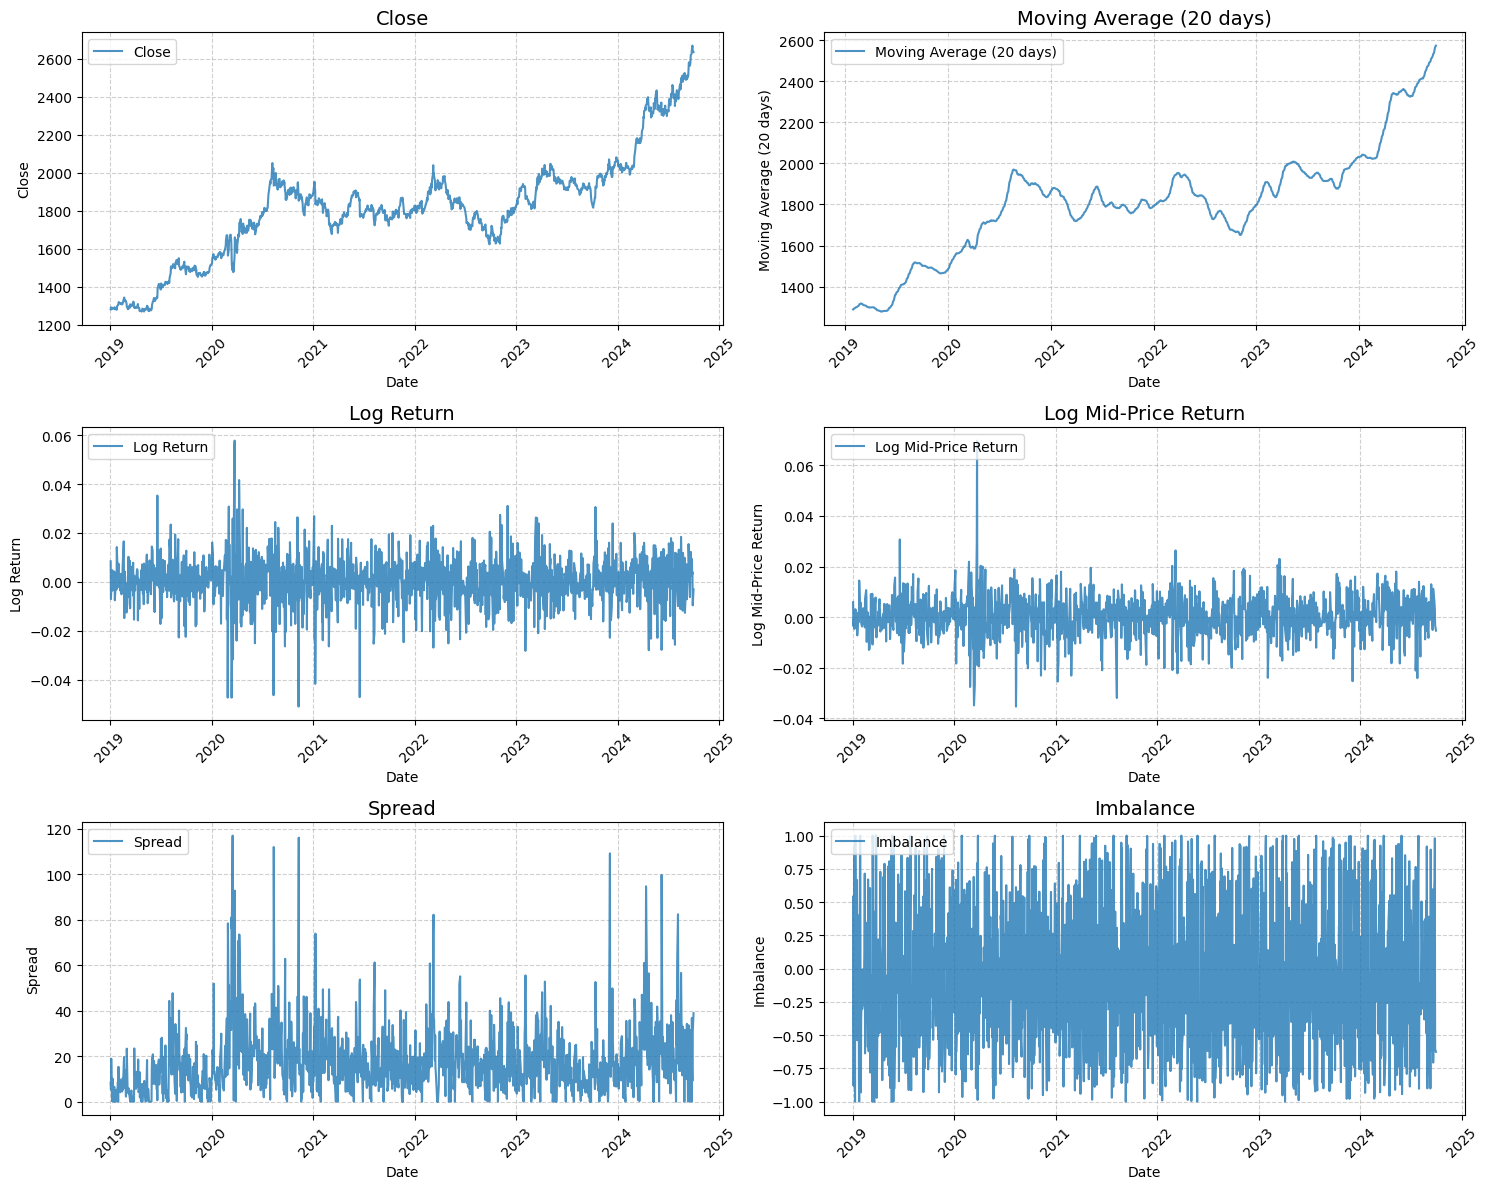

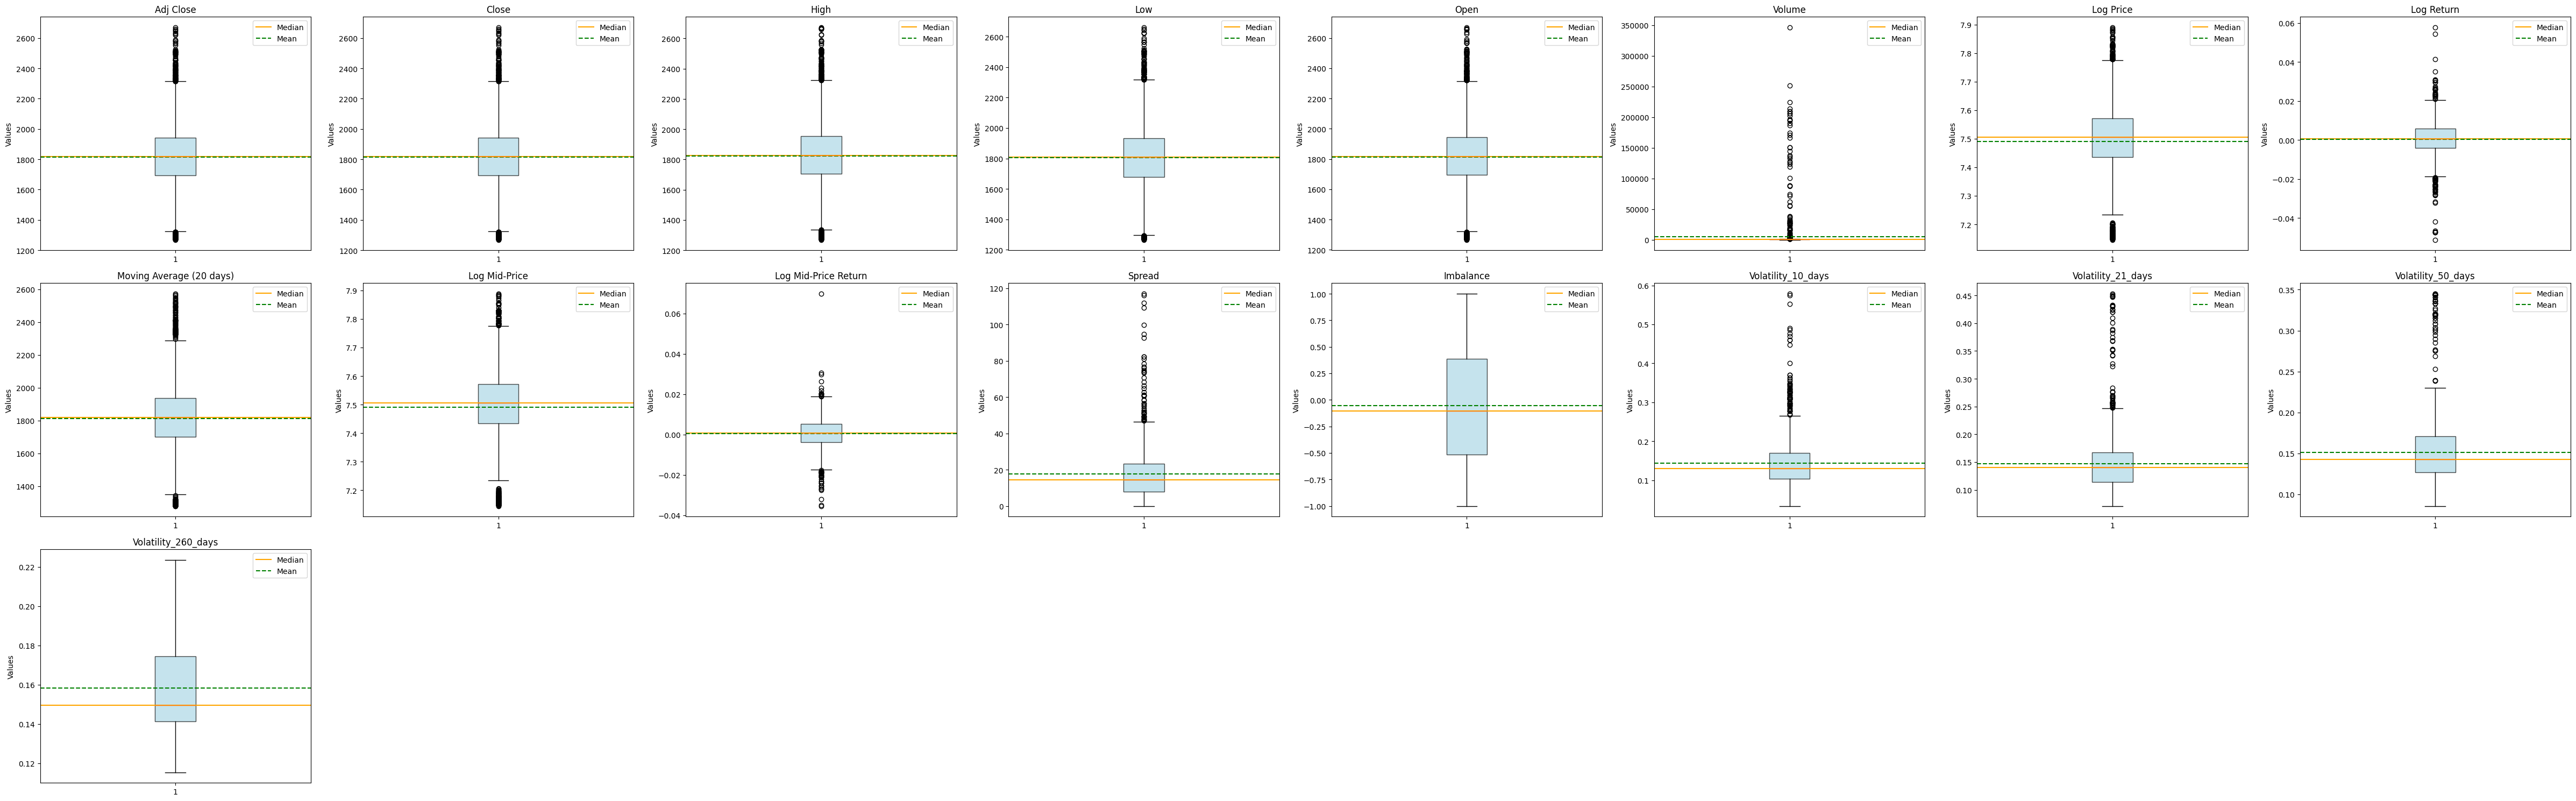

In [17]:
# Visualize all key metrics in a single multi-panel plot
data_visualization.plot_metrics(gold_data[["Close", "Moving Average (20 days)", "Log Return", "Log Mid-Price Return", "Spread", "Imbalance"]])

# Outliers identification
# Plot box plots for all numeric variables
data_visualization.plot_boxplots(gold_data, plots_per_column=8)


We keep only the main features we will use for model training

In [18]:
selected_data = gold_data[['Imbalance', 'Spread', 'Log Mid-Price Return', 'Moving Average (20 days)', 'Log Return', 'Volume', 'Close', 'Volatility_10_days', 'Volatility_21_days', 'Volatility_50_days','Volatility_260_days']]

display(selected_data)

Imbalance     Spread  Log Mid-Price Return  \
Date                                                     
2019-01-02        NaN   8.400024                   NaN   
2019-01-03  -0.874214   5.300049              0.005873   
2019-01-04   0.545455  18.899902             -0.003574   
2019-01-07  -0.888889   0.200073              0.001517   
2019-01-08   0.928571   5.000000             -0.004674   
...               ...        ...                   ...   
2024-09-24   0.590909  36.800049              0.006603   
2024-09-25   0.666667  14.899902              0.004848   
2024-09-26   0.979875   9.099854              0.003232   
2024-09-27  -0.605671  30.400146             -0.003175   
2024-09-30  -0.625841  38.900146             -0.005378   

            Moving Average (20 days)  Log Return  Volume        Close  \
Date                                                                    
2019-01-02                       NaN         NaN     149  1281.000000   
2019-01-03                       NaN    0.008396      10  1291.800049   
2019-01-04                       NaN   -0.007069      34  1282.699951   
2019-01-07                       NaN    0.003191       2  1286.800049   
2019-01-08                       NaN   -0.002802      54  1283.199951   
...                              ...         ...     ...          ...   
2024-09-24               2544.219983    0.009360      35  2651.199951   
2024-09-25               2551.379980    0.003013     175  2659.199951   
2024-09-26               2559.824976    0.004016   17216  2669.899902   
2024-09-27               2565.754980   -0.009635    4228  2644.300049   
2024-09-30               2572.869983   -0.003106     973  2636.100098   

            Volatility_10_days  Volatility_21_days  Volatility_50_days  \
Date                                                                     
2019-01-02                 NaN                 NaN                 NaN   
2019-01-03                 NaN                 NaN                 NaN   
2019-01-04                 NaN                 NaN                 NaN   
2019-01-07                 NaN                 NaN                 NaN   
2019-01-08                 NaN                 NaN                 NaN   
...                        ...                 ...                 ...   
2024-09-24            0.108579            0.112733            0.146230   
2024-09-25            0.105284            0.112676            0.142517   
2024-09-26            0.090186            0.112126            0.142222   
2024-09-27            0.105087            0.116378            0.144343   
2024-09-30            0.107986            0.114947            0.133247   

            Volatility_260_days  
Date                             
2019-01-02                  NaN  
2019-01-03                  NaN  
2019-01-04                  NaN  
2019-01-07                  NaN  
2019-01-08                  NaN  
...                         ...  
2024-09-24             0.142074  
2024-09-25             0.142064  
2024-09-26             0.142088  
2024-09-27             0.142375  
2024-09-30             0.142411  

[1446 rows x 11 columns]

Lead-lag computation

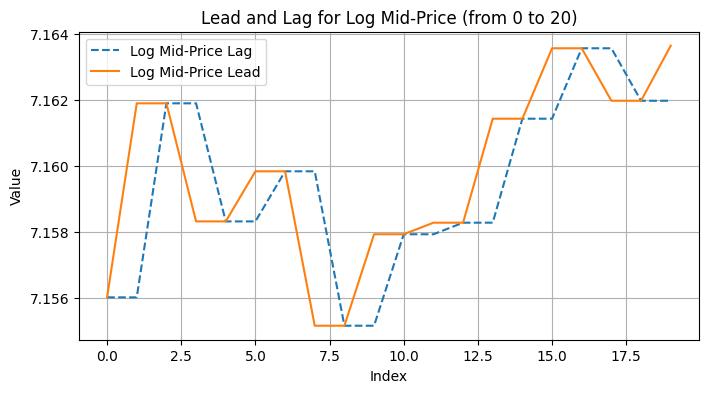

In [19]:
# Step 3: Apply lead-lag transformation
lead_lag_data = data_processing.apply_lead_lag(gold_data, lead_lag_columns=['Log Mid-Price'])

# Visualize the transformed features lead-lag
data_visualization.plot_lead_lag(lead_lag_data, ["Log Mid-Price"])



Signatures computation

In [20]:
# Compute the signature of order 3 for the lead-lag data
signatures_order_2 = data_processing.compute_signature(
    selected_data,
    order=2,
    windows=[21],
    # exclude_cols = [] # Example: exclude the normalized time if present
)


Quick visualization of the signatures

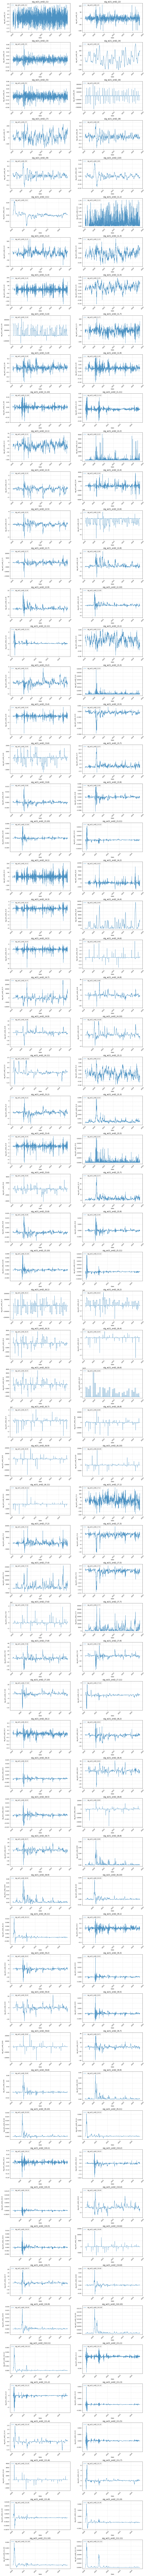

In [21]:
data_visualization.plot_metrics(signatures_order_2)

Data formatting

In [22]:

# Step 4: Normalize the time column which can't be normalise as needed by transformers:
# time_normalized_data = data_processing.normalize_features(gold_data)

# We split the dataframe into  a train and a test set:

print(signatures_order_2.shape)
print(selected_data.shape)


(1446, 132)
(1446, 11)
